First, load the data,in this notebook we are using the Moss data:



In [1]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import RunML_continue
import FS
import metric

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle
import matplotlib.pyplot as plt

### 1. Load the data and data preprocess
After reading the data, convert the abundance matrix into relative abundance matrix; 

In [3]:
df=pd.read_csv('../data/relative_abundance_df.csv',index_col = 0)
df

,Beijerinckiaceae,Mycobacteriaceae,Ktedonobacteraceae,Bryum argenteum var. argenteum,Burkholderiaceae,Micromonosporaceae,Opitutaceae,WD2101 soil group,Xanthobacteraceae,Chitinophagaceae,...,Marinifilaceae,Aerococcaceae,Acetobacterales Incertae Sedis,Bacteroidaceae,Hydrogenophilaceae,Arachis hypogaea var. vulgaris,Demequinaceae,Pseudohongiellaceae,Bacteroidetes vadinHA17,Thermoanaerobacteraceae
Sp1,57.894737,31.578947,10.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp2,1.448965,0.631692,0.039258,10.413990,6.381156,4.043540,4.025696,3.540328,3.404711,3.222698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp4,1.247068,0.856460,0.017705,0.000000,4.564467,1.226043,1.406409,3.713540,6.305050,6.754304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp5,0.524455,1.700505,0.190711,0.131114,8.470738,2.789145,3.198379,5.602130,3.929437,3.579801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp6,5.468805,80.751917,0.000000,0.000000,5.992825,0.000000,0.014068,0.000000,0.274319,0.235633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp7,2.525957,1.713743,0.005582,0.018142,4.873283,0.117227,1.646757,6.127889,2.756224,1.773752,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp8,2.184587,1.202563,1.198402,0.000000,17.023136,0.000000,0.890479,4.277630,5.629993,3.649301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp9,1.280438,0.458262,0.705364,0.000000,10.149160,4.834217,2.920298,4.506245,3.149429,3.037110,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp10,7.142857,7.142857,4.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.844156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# target variable
y_data = pd.read_excel('../data/rawdata/Moss-classification.xlsx') 
print(y_data)
y = y_data.iloc[:,2].values
print(y)
print(pd.Series(y).value_counts())

      NO.                           Moss name classification(30)  Week 4  \
0    sp.1             Brachythecium Rutabulum               Good      33   
1    sp.2                  Platygyrium Repens                Bad       0   
2    sp.3            Bryoandersonia illecebra               Good      10   
3    sp.4                Aulacomnium Palustre                Bad       0   
4    sp.5                   Entodon seductrix               Good       0   
5    sp.6                    Hedwigia ciliata                Bad       0   
6    sp.7                  Leucobryum glaucum                Bad       0   
7    sp.8                   Sphagnum palustre                Bad       0   
8    sp.9                      Bryum argentum                Bad       0   
9   sp.10                Ceretodon purpureous                Bad       0   
10  sp.11                 Atrichum angustatum               Good      55   
11  sp.12                 Anomodon attenuates               Good       9   
12  sp.13   

In [5]:
ASVs = df.columns
ASVs

Index(['Beijerinckiaceae', 'Mycobacteriaceae', 'Ktedonobacteraceae',
       'Bryum argenteum var. argenteum', 'Burkholderiaceae',
       'Micromonosporaceae', 'Opitutaceae', 'WD2101 soil group',
       'Xanthobacteraceae', 'Chitinophagaceae',
       ...
       'Marinifilaceae', 'Aerococcaceae', 'Acetobacterales Incertae Sedis',
       'Bacteroidaceae', 'Hydrogenophilaceae',
       'Arachis hypogaea var. vulgaris', 'Demequinaceae',
       'Pseudohongiellaceae', 'Bacteroidetes vadinHA17',
       'Thermoanaerobacteraceae'],
      dtype='object', length=328)

### 2. Kruskal-Wallis H-test
The default p value of the function is 10%, the resulted index is ranked by its H statistics descendingly.

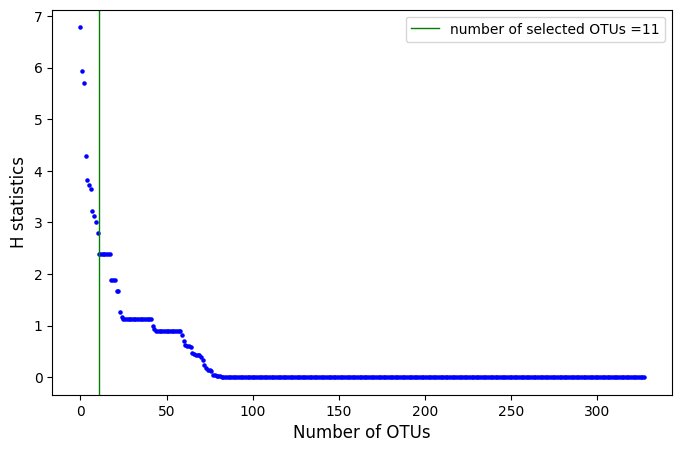

In [6]:
select_result = FS.SelectMicro_fun(df,y)

In [7]:
select_result.keys()
# abundance matrix--> relative abundance matrix (relative by sample, and delete that below 1%)
data=select_result['relative_abundance_data']
print(np.shape(data))

(17, 328)


In [8]:
data

array([[0.57894737, 0.31578947, 0.10526316, ..., 0.        , 0.        ,
        0.        ],
       [0.01448965, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01897887, 0.02090615, 0.10224414, ..., 0.        , 0.        ,
        0.        ],
       [0.20714286, 0.25357143, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24786325, 0.15384615, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
#  H score for each OTU, the function will: 1. filter those below threshold (1%) to 0; 2. rank the data; calculate the H statistics
weights=select_result['H_score']

In [10]:
selectedOTU_index = select_result['selected_indices']
eps = len(selectedOTU_index)

print(eps)

11


In [11]:
# the subset based on the method.
X_FS = select_result['selected_data']

In [12]:
ASVs_selected= select_result['selected_columnames']
print(ASVs_selected)
#plot the h statistics and cutoff descendingly
# FS.plotWeightedIndex(weights,threshold=eps)

Index(['Acetobacteraceae', 'Solibacteraceae (Subgroup 3)', 'Pedosphaeraceae',
       'Acidobacteriaceae (Subgroup 1)', 'Clostridiaceae 1', 'Isosphaeraceae',
       'Pseudomonadaceae', 'Gemmataceae', 'WD2101 soil group',
       'Acidothermaceae', 'Xanthomonadaceae'],
      dtype='object')


In [13]:
df_selected = pd.DataFrame(X_FS, columns=ASVs_selected)
df_selected['Y'] =y
print(df_selected.iloc[:,8:12].sort_values(by='Y'))

    WD2101 soil group  Acidothermaceae  Xanthomonadaceae     Y
8            0.045062         0.000000          0.000000   Bad
1            0.035403         0.000000          0.000000   Bad
14           0.078300         0.074772          0.000000   Bad
3            0.037135         0.000000          0.000000   Bad
5            0.000000         0.000000          0.000000   Bad
6            0.061279         0.041783          0.000000   Bad
7            0.042776         0.000000          0.000000   Bad
12           0.023312         0.022712          0.021866   Bad
9            0.000000         0.000000          0.000000   Bad
13           0.010623         0.000000          0.090786  Good
11           0.028007         0.000000          0.000000  Good
0            0.000000         0.000000          0.000000  Good
15           0.000000         0.000000          0.039286  Good
4            0.056021         0.000000          0.013151  Good
2            0.000000         0.000000          0.00000

### Model
Prepare 4 datasets: full dataset, our selected dataset, Lasso selected  dataset(based on the target variable), randomly selected data (selected the same numer of variables as in our method)

Use random forest and SVM as classifier, and will build both models for each response variable.

For Lasso, the dataset will be determined by the response variable, so the lasso subset is different for the models for different response variables.

For random selection, the  process will repeat iter=30 times to  find the mean accuracy and AUC

SMOTE  is used (the data is not balanced, as we can see the performance is really bad especially for SVM model when not using SMOTE)

In [14]:
iter =30
cls = ["RF","SVM"]

In [15]:
targetLabel=y
print(selectedOTU_index)

[14, 25, 51, 42, 108, 11, 113, 17, 7, 82, 37]


In [16]:
X_lasso,xlabel_lasso = RunML_continue.LassoFeatureSelection(data,targetLabel)
print(xlabel_lasso)

[  0  14  25  32  58  62  76 108 148 153 168]


In [17]:
X_lasso_ft,xlabel_lasso_ft  = RunML_continue.LassoFS_CV(data,targetLabel)
print(xlabel_lasso_ft)

Best alpha: 0.1
[  0  14  25  32  56  58  76 108 113 153 168]


In [18]:
data_subset = {"AllFeatures":data, 
               "SelectMicro": X_FS,
               "Lasso":X_lasso,
               "Lasso_finetune":X_lasso_ft,
               "Random":data
              }

In [19]:
print(np.shape(data))
print(np.shape(X_FS))
print(np.shape(X_lasso))
print(np.shape(X_lasso_ft))

(17, 328)
(17, 11)
(17, 11)
(17, 11)


The  function will print out the accuracy and AUC for each dataset using each classifier, and also will return the y_actual, y_predict, y_predprob for future use.

In [20]:
dict_cm3 = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,N=iter,classifiers=cls,SMOTE=True)

                RF_Accuracy  RF_AUC  SVM_Accuracy  SVM_AUC
AllFeatures        0.533333   0.725      0.600000    0.250
SelectMicro        0.700000   0.900      0.833333    0.225
Lasso              0.766667   0.950      0.750000    0.800
Lasso_finetune     0.833333   0.925      0.700000    0.800
Random             0.590000   0.620      0.565556    0.390


In [21]:
X_lasso_FS1 = data[:,np.intersect1d(selectedOTU_index, xlabel_lasso)]
X_lasso_FS2 = data[:,np.intersect1d(selectedOTU_index, xlabel_lasso_ft)]
print(np.shape(X_lasso_FS1))
print(np.shape(X_lasso_FS2))
data_subset2 = {
               "intersection":X_lasso_FS1,
               "intersection_ft": X_lasso_FS2
              }

dict_cm2 = RunML_continue.runClassifier_FScompare(data_subsets= data_subset2,y= targetLabel,N=iter,classifiers=cls)

(17, 3)
(17, 4)
                 RF_Accuracy  RF_AUC  SVM_Accuracy  SVM_AUC
intersection        0.633333   0.825      0.766667    0.900
intersection_ft     0.700000   0.900      0.833333    0.225


In [22]:
dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,N=iter,classifiers=cls,SMOTE=False)

                RF_Accuracy    RF_AUC  SVM_Accuracy  SVM_AUC
AllFeatures        0.533333  0.725000      0.600000    0.250
SelectMicro        0.700000  0.900000      0.833333    0.225
Lasso              0.766667  0.950000      0.750000    0.800
Lasso_finetune     0.833333  0.925000      0.700000    0.800
Random             0.577222  0.618333      0.544444    0.400


In [23]:
ASVs_selected_lasso = ASVs[xlabel_lasso]

# Convert arrays to sets for easier operations
set_FS = set(ASVs_selected)
set_Lasso = set(ASVs_selected_lasso)

# Items in both arrays (intersection)
intersection = set_FS & set_Lasso

# Items in array A but not in array B (difference)
only_in_a = set_FS - set_Lasso

# Items in array B but not in array A (difference)
only_in_b = set_Lasso - set_FS

# Print results
print("Items in both selection:", intersection)
print("Items in array FS but not in Lasso:", only_in_a)
print("Items in Lasso but not in FS:", only_in_b)

Items in both selection: {'Solibacteraceae (Subgroup 3)', 'Acetobacteraceae', 'Clostridiaceae 1'}
Items in array FS but not in Lasso: {'Pseudomonadaceae', 'Gemmataceae', 'WD2101 soil group', 'Acidobacteriaceae (Subgroup 1)', 'Acidothermaceae', 'Xanthomonadaceae', 'Pedosphaeraceae', 'Isosphaeraceae'}
Items in Lasso but not in FS: {'Cloacimonadaceae', 'Beijerinckiaceae', 'SC-I-84', 'Dysgonomonadaceae', 'Spirochaetaceae', 'Rubritaleaceae', 'Pseudonocardiaceae', 'Rhizobiales Incertae Sedis'}


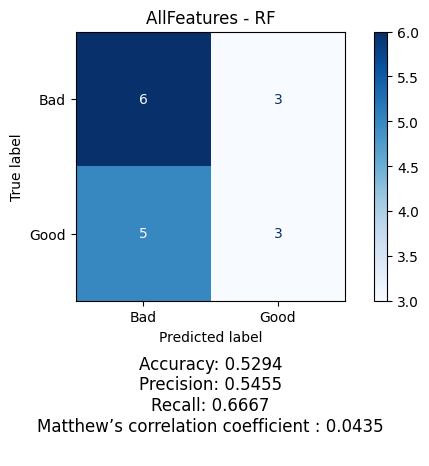

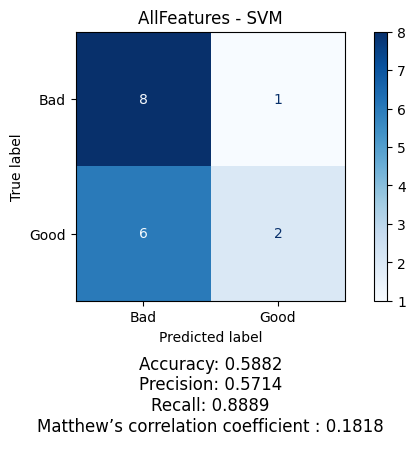

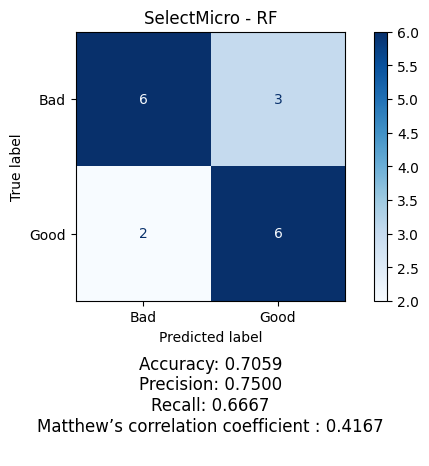

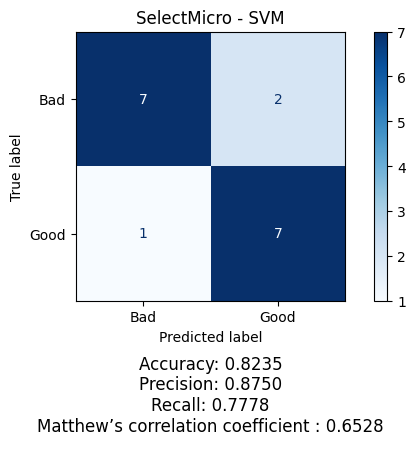

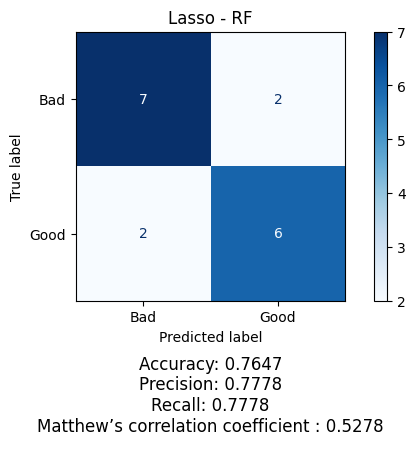

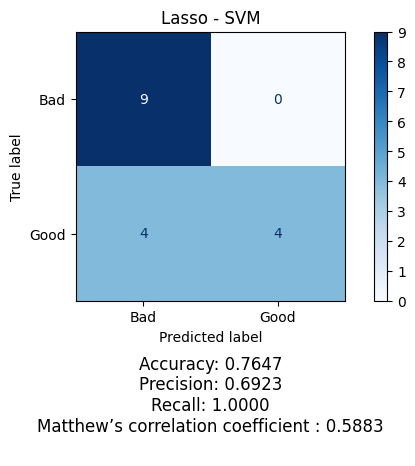

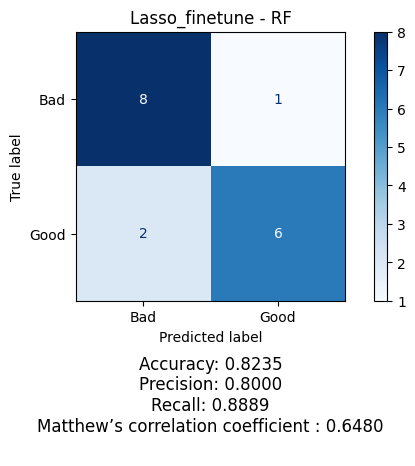

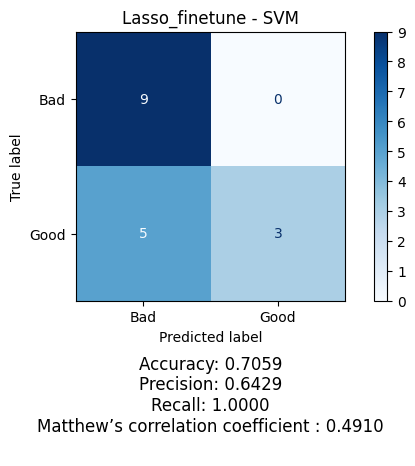

In [24]:
# do not use plotmacro_confusion_matrices (not for binary classification)
for dataset_name, classifiers in dict_cm.items():
        for classifier_name, labels in classifiers.items():
            actual_labels = labels[0]
            predicted_labels = labels[1]
            metric.plot_confusion_matrices(actual_labels, predicted_labels,f"{dataset_name} - {classifier_name}")

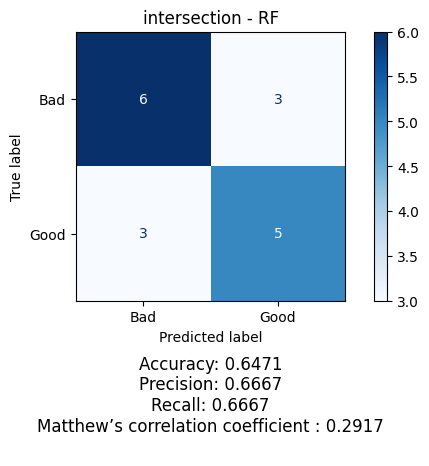

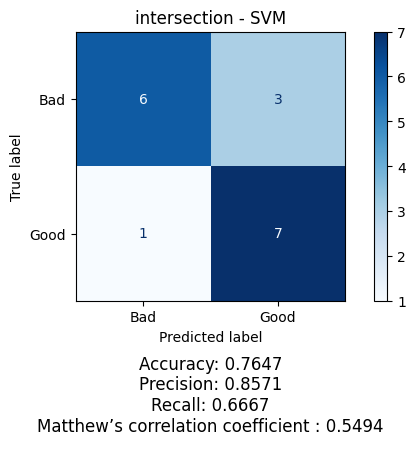

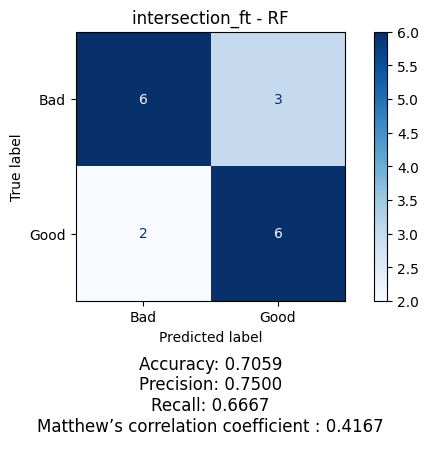

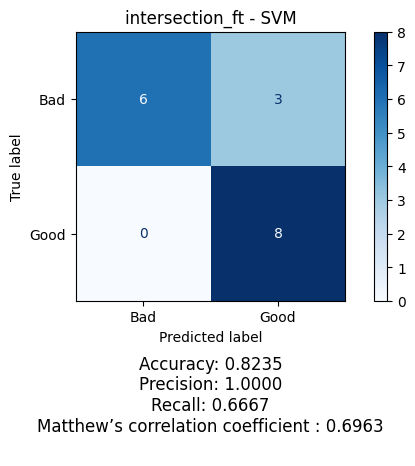

In [25]:
# do not use plotmacro_confusion_matrices (not for binary classification)
for dataset_name, classifiers in dict_cm2.items():
        for classifier_name, labels in classifiers.items():
            actual_labels = labels[0]
            predicted_labels = labels[1]
            metric.plot_confusion_matrices(actual_labels, predicted_labels,f"{dataset_name} - {classifier_name}")

### compare the first 15 index by their present ratio

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                               OTU  presence_pos  presence_neg
0                 Acetobacteraceae         0.125      0.777778
1     Solibacteraceae (Subgroup 3)         0.250      0.777778
2                  Pedosphaeraceae         0.000      0.555556
3   Acidobacteriaceae (Subgroup 1)         0.000      0.444444
4                 Clostridiaceae 1         0.375      0.000000
5                   Isosphaeraceae         0.250      0.777778
6                 Pseudomonadaceae         0.500      0.111111
7                      Gemmataceae         0.375      0.777778
8                WD2101 soil group         0.500      0.777778
9                  Acidothermaceae         0.000      0.333333
10                Xanthomonadaceae         0.500      0.111111


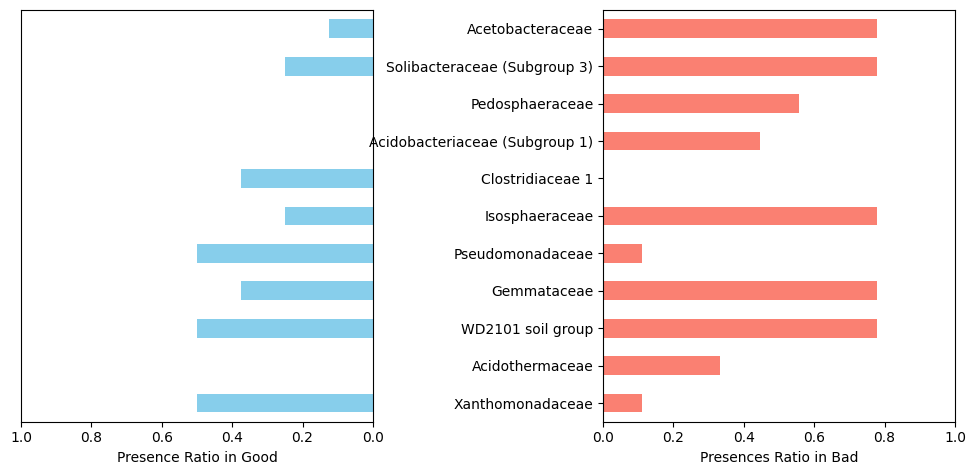

In [26]:
FS.plotPresenseRatio(X_FS,targetLabel,ASVs_selected,posLabel="Good",posText="Good",negText="Bad")

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                             OTU  presence_pos  presence_neg
0               Beijerinckiaceae         0.500      1.000000
1               Acetobacteraceae         0.125      0.777778
2   Solibacteraceae (Subgroup 3)         0.250      0.777778
3             Pseudonocardiaceae         0.250      0.000000
4                Spirochaetaceae         0.500      0.333333
5     Rhizobiales Incertae Sedis         0.250      0.111111
6                        SC-I-84         0.125      0.000000
7               Clostridiaceae 1         0.375      0.000000
8              Dysgonomonadaceae         0.250      0.000000
9                 Rubritaleaceae         0.000      0.111111
10              Cloacimonadaceae         0.000      0.111111


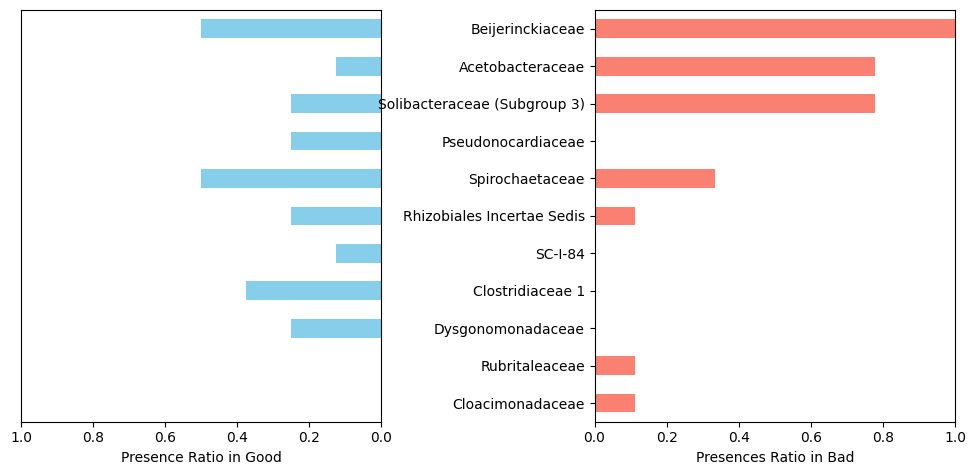

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                             OTU  presence_pos  presence_neg
0               Beijerinckiaceae         0.500      1.000000
1               Acetobacteraceae         0.125      0.777778
2   Solibacteraceae (Subgroup 3)         0.250      0.777778
3             Pseudonocardiaceae         0.250      0.000000
4                   JG30-KF-CM45         0.250      0.000000
5                Spirochaetaceae         0.500      0.333333
6                        SC-I-84         0.125      0.000000
7               Clostridiaceae 1         0.375      0.000000
8               Pseudomonadaceae         0.500      0.111111
9                 Rubritaleaceae         0.000      0.111111
10              Cloacimonadaceae         0.000      0.111111


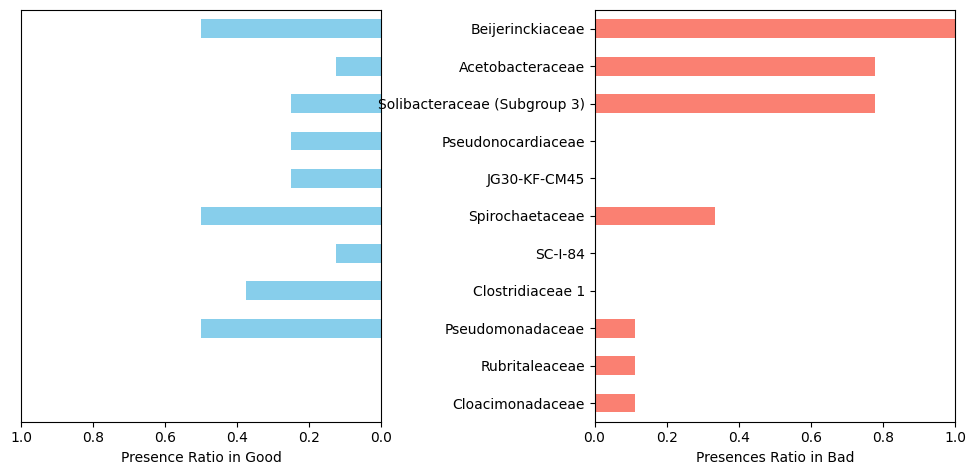

In [27]:
ASVs_selected_lasso = ASVs[xlabel_lasso]
FS.plotPresenseRatio(X_lasso,targetLabel,ASVs_selected_lasso,posLabel="Good",posText="Good",negText="Bad")
ASVs_selected_lasso_ft = ASVs[xlabel_lasso_ft]
FS.plotPresenseRatio(X_lasso_ft,targetLabel,ASVs_selected_lasso_ft,posLabel="Good",posText="Good",negText="Bad")

In [28]:
df_FS = pd.DataFrame(X_FS)
df_FS.columns = ASVs_selected
df_FS.index = y


In [29]:
df_lasso=pd.DataFrame(X_lasso)
df_lasso.columns = ASVs_selected_lasso
df_lasso.index = y

# Sort DataFrame by index
df_sorted = df_lasso.sort_index()

#print("\nSorted DataFrame by index:")
#print(df_sorted)

In [30]:
weights[xlabel_lasso]# check it's H

array([0.03749655, 6.78480204, 5.94535519, 2.390625  , 1.67127496,
       0.33487227, 1.125     , 3.81440443, 2.390625  , 0.88888889,
       0.88888889])

In [31]:
unique_groups = np.unique(y)
for i in range(len(xlabel_lasso)):
    test = [data[y == group,xlabel_lasso[i]] for group in unique_groups]
    print(stats.kruskal(*test))

NameError: name 'stats' is not defined

### Negative Gini Impurity
Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. It’s calculated as:

$G = 1- \sum_{i=1}^C p_i^2$

where C is the number of classes. (which means it can be used to measure for multiple level classification)

Here I will use the negative Gini Impurity to measure each OTU, if NG is large (1) which means the OTU only exist in one class, if NG value is small($1/c$) which means the OTU is evenly distributed among  the classes.

$NG = \sum_{i=1}^C p_i^2$

In [ ]:
# NG for selected OTU
NG_selected = metric.Neg_GINI(X_FS,y)
print(NG_selected.shape)
# NG for Not selected OTU
X_FS_none = np.delete(data, selectedOTU_index, axis=1)
NG_noselected = metric.Neg_GINI(X_FS_none,y)
print(NG_noselected.shape)

In [ ]:
X_lasso = data[:,xlabel_lasso]
print(X_lasso.shape)
X_lasso_none = np.delete(data, xlabel_lasso, axis=1)
print(X_lasso_none.shape)
Ng1 = metric.Neg_GINI(X_lasso,y)
Ng2 = metric.Neg_GINI(X_lasso_none,y)
ng_lasso=[Ng1,Ng2]


In [ ]:
NG_selected

In [ ]:
ng_lasso[0]

#### Compare lasso and SelectMicro

In [ ]:
plt.boxplot([NG_selected, ng_lasso[0]], tick_labels=['SelectMicro', 'Lasso'])
plt.title(f'NG results of the selected OTU vs. non-selected OTUs')
plt.ylabel('NG')
plt.grid(axis='y')
#print(len(NG_selected[i, :]))
# Adjust layout
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()  # Show all plots at once
# the median of Lasso is 1

In [ ]:
# compare the selected and non select by our method

plt.boxplot([NG_selected, NG_noselected], tick_labels=['SelectMicro', 'Not selected'])
plt.title(f'NG results of the selected OTU vs. non selected OTUs by our method')
plt.ylabel('NG')
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
# compare the selected and non select by lasso

plt.boxplot([ng_lasso[0], ng_lasso[1]], tick_labels=['Lasso', 'Not selected'])
plt.title(f'NG results of the selected OTU vs. non-selected OTUs by Lasso')
plt.ylabel('NG')
plt.grid(axis='y')
# Adjust layout
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()  # Show all plots at once

In [ ]:
# Import necessary libraries
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score



In [ ]:

# Assuming you already have your data (X: features, y: response)
X = X_FS  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.append(y_test)
    y_predict.append(y_pred)

In [ ]:
# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")


In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = SVC(kernel='linear', C=1.0, gamma='scale', probability=True)  # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.append(y_test)
    y_predict.append(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='linear', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.append(y_test)
    y_predict.append(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='linear', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='rbf', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso_ft  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='rbf', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='rbf', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='linear', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='poly', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")